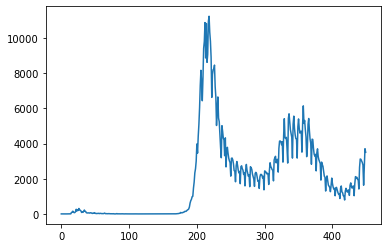

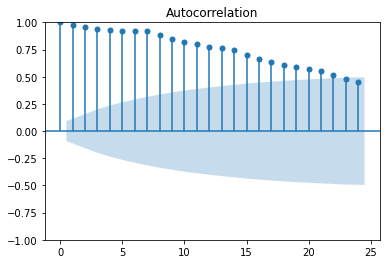

C:\Users\Todd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


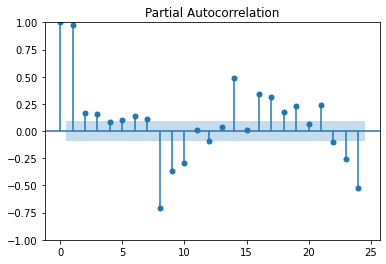

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'D:\專題\各縣市每日確診資料\台北市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Taipei.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Taipei_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Taipei_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'D:\專題\各縣市每日確診資料\台北市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        2
1        1
2        1
3        1
4        1
..     ...
446   1635
447   2734
448   3710
449   3508
450   2865

[451 rows x 1 columns]
451


## RNN結合LSTM架構

### Model1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 2s 14ms/step - loss: 0.0669 - mse: 0.0669 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3/100
41/41 [==============================] 

Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 61/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 62/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 64/100
41/41 [==============================] - 0s 3ms/step - loss: 0.

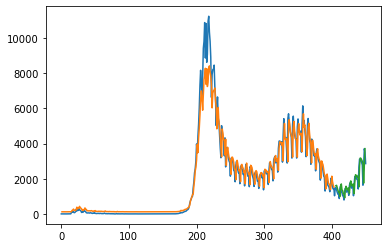

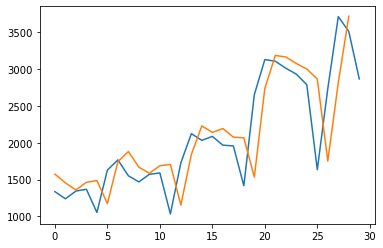

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 128)            16640     
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
41/41 [==============================] - 3s 15ms/step - loss: 0.0622 - mse: 0.0622 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 2/100
41/41 [==============================] - 2s 44ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/100
41/41 [==============================]

Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 58/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 61/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 62/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 63/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 64/100
41/41 [==============================] - 0s 3ms/step - loss: 0.

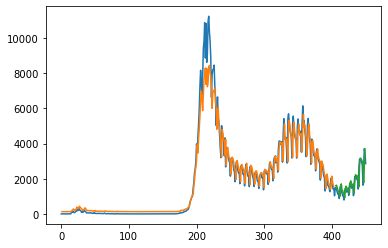

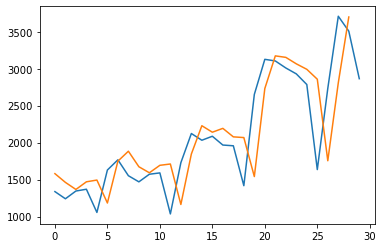

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model3

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_40 (SimpleRNN)   (None, 1, 64)             4224      
                                                                 
 simple_rnn_41 (SimpleRNN)   (None, 1, 64)             8256      
                                                                 
 dense_40 (Dense)            (None, 1, 64)             4160      
                                                                 
 lstm_38 (LSTM)              (None, 1, 64)             33024     
                                                                 
 lstm_39 (LSTM)              (None, 64)                33024     
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-tra

Epoch 54/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 55/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 56/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 57/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 58/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 59/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 60/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 61/100
41/41 [==============================] - 0s 4ms/step - loss: 0.

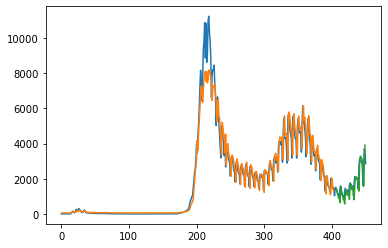

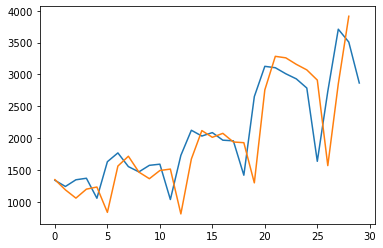

In [28]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=100, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()

### Model4

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 1, 64)             4224      
                                                                 
 dense_32 (Dense)            (None, 1, 4)              260       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 1, 64)             4416      
                                                                 
 dense_33 (Dense)            (None, 1, 1)              65        
                                                                 
 lstm_16 (LSTM)              (None, 1, 64)             16896     
                                                                 
 dense_34 (Dense)            (None, 1, 4)              260       
                                                                 
 lstm_17 (LSTM)              (None, 1, 64)            

41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 113/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 114/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 115/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 116/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 117/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 118/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 119/1000
41/41 [==============================] - 0s 4ms/step - loss: 0

41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 235/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 236/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 237/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 238/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 239/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 240/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 241/1000
41/41 [==============================] - 0s 4ms/step - loss: 0

41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 357/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 358/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 359/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 360/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 361/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 362/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 363/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 479/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 480/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 481/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 482/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 483/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 484/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 485/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 601/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 602/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 603/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 604/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 605/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 606/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 607/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

41/41 [==============================] - 0s 4ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 723/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 724/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 725/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 726/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 727/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 728/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 729/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 845/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 846/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 847/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 848/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 849/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 850/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 851/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 967/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 968/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 969/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 970/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 971/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 972/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 973/1000
41/41 [==============================] - 0s 3ms/step - loss: 0

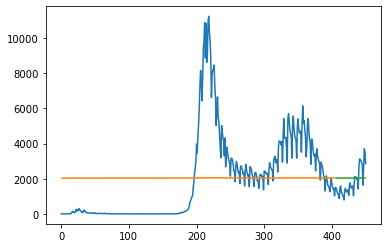

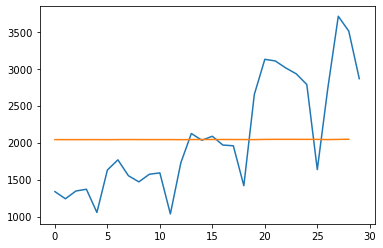

In [11]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taipei_gru_lstm.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taipei.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('Taipei_plot.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taipei_predict&real.png")
plt.show()